In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [6]:
df.shape

(103, 7)

In [7]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## Data Cleaning

In [8]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.', '').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.', '')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.', '').str.replace(',','.')


In [9]:
#removing extra spaces
df.rename(columns = {'Production (Tons)':'Production(Tons)'},inplace = True)
df.rename(columns = {'Production per Person (Kg)':'Production_per_Person(Kg)'}, inplace = True)
df.rename(columns = {'Acreage (Hectare)':'Acreage(Hectare)'}, inplace = True)
df.rename(columns ={'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'},inplace = True)

In [10]:
df.isnull().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [11]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [12]:
df.dropna()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,43596.5
98,98,Lebanon,Asia,97,16,3,28386.4
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8


In [13]:
df.reset_index()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
98,98,98,Lebanon,Asia,97,16,3,28386.4
99,99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,100,Singapore,Asia,50,9,2,25
101,101,101,Samoa,Oceania,12,6,1,11949.8


In [14]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [15]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [16]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [17]:
#converting obj into floating numbers
df['Production(Tons)'] = df['Production(Tons)'].astype(float)

In [18]:
df['Production_per_Person(Kg)'] = df['Production_per_Person(Kg)'].astype(float)
df['Yield(Kg/Hectare)'] =df['Yield(Kg/Hectare)'].astype(float) 
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)

In [19]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

## Univariate Analysis

In [20]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many countries prodcue sugarcane from each continent?

In [21]:
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

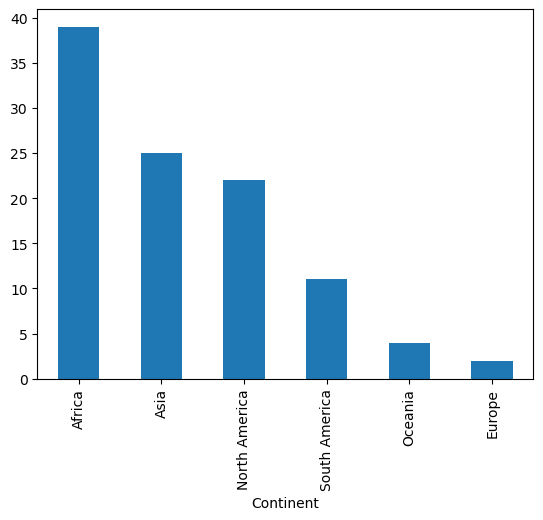

In [22]:
df['Continent'].value_counts().plot(kind = 'bar')

## Cheking distribution

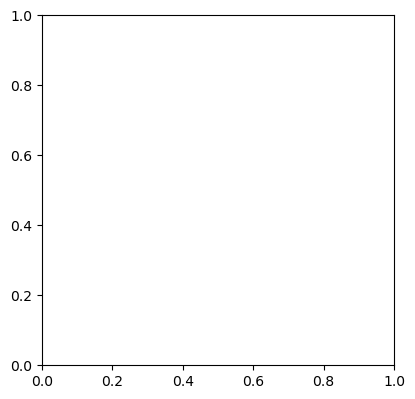

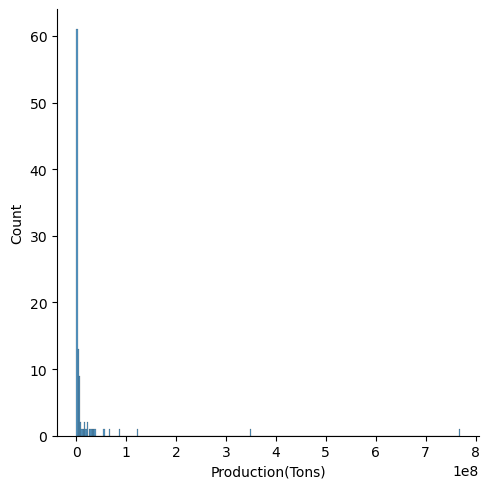

In [23]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.displot(df['Production(Tons)'])

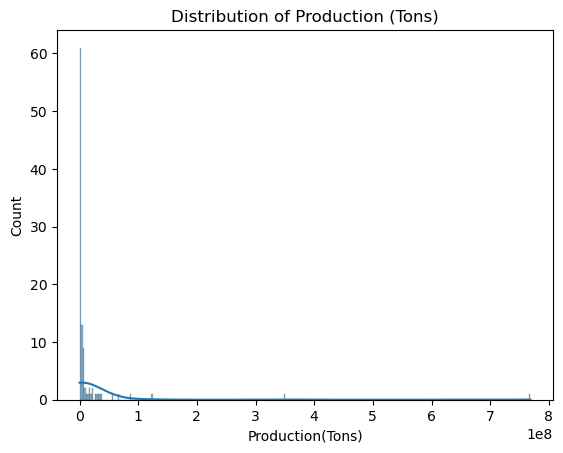

In [24]:
sns.histplot(df['Production(Tons)'], kde=True)  # kde=True adds the smooth curve
plt.title('Distribution of Production (Tons)')
plt.show()

## Cheking outliers

In [ ]:
# to see distribution
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(df['Production(Tons)'])
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(df['Production_per_Person(Kg)'])
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(df['Acreage(Hectare)'])
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(df['Yield(Kg/Hectare)'])

<Axes: ylabel='Yield(Kg/Hectare)'>

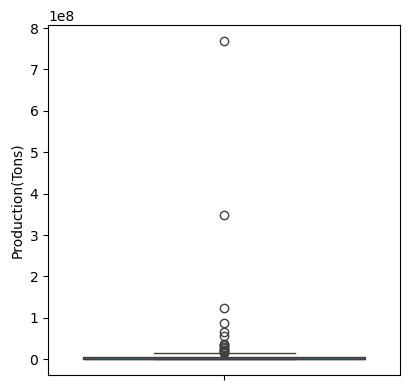

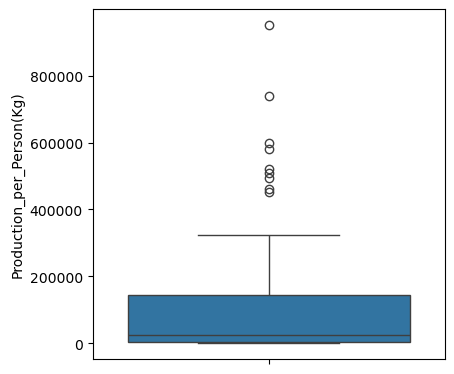

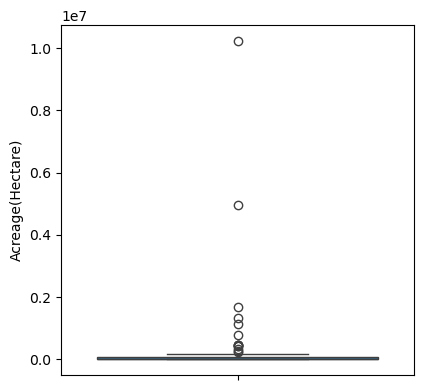

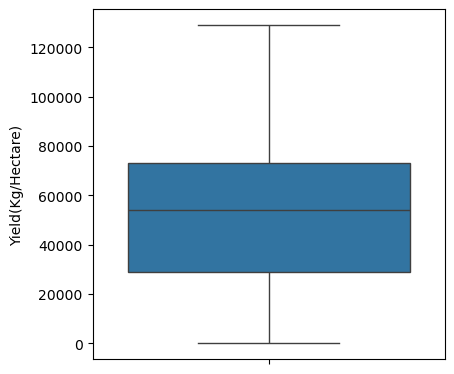

In [26]:
# to see outliers
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Acreage(Hectare)'])
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Yield(Kg/Hectare)'])

In [27]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.030000e+02,103.000000,1.020000e+02,102.000000
mean,1.832407e+07,111856.305311,2.498981e+05,52628.078431
std,8.379760e+07,176134.928689,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,4.298850e+04,3364.869000,1.104000e+03,29072.025000
50%,1.422432e+06,25481.000000,1.655800e+04,54108.950000
75%,6.145648e+06,144004.500000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Bivariate analysis

In [28]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Which country produces maximum sugarcane?

In [29]:
df_new = df[['Country','Production(Tons)']].set_index('Country')

In [30]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Djibouti,53.0
Singapore,50.0


In [31]:
df_new['Production(Tons)_percent'] = df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [32]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072728e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Djibouti,53.0,2.808126e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

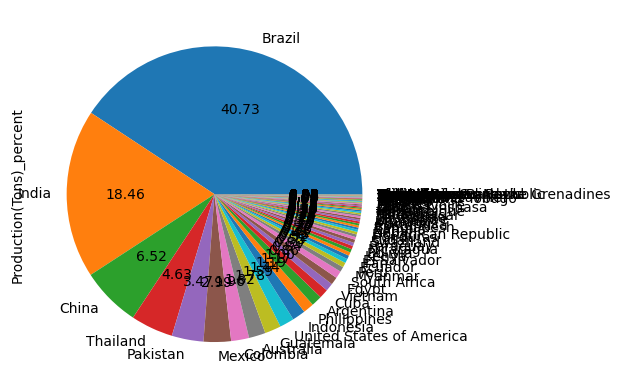

In [33]:
# Method - 1
df_new['Production(Tons)_percent'].plot(kind = 'pie',autopct = '%.2f')

<Axes: xlabel='Country'>

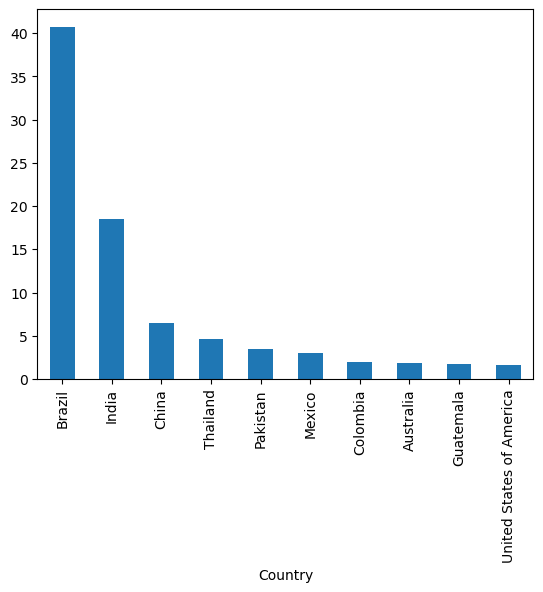

In [53]:
# Method -2
df_new['Production(Tons)_percent'].head(10).plot(kind = 'bar')

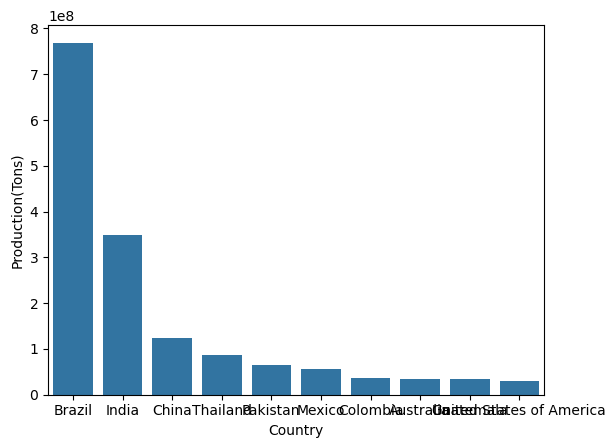

In [54]:
# Method -3
ax = sns.barplot(data = df.head(10), x = 'Country', y = 'Production(Tons)')

C:\Users\surab\AppData\Local\Temp\ipykernel_11372\1298631989.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


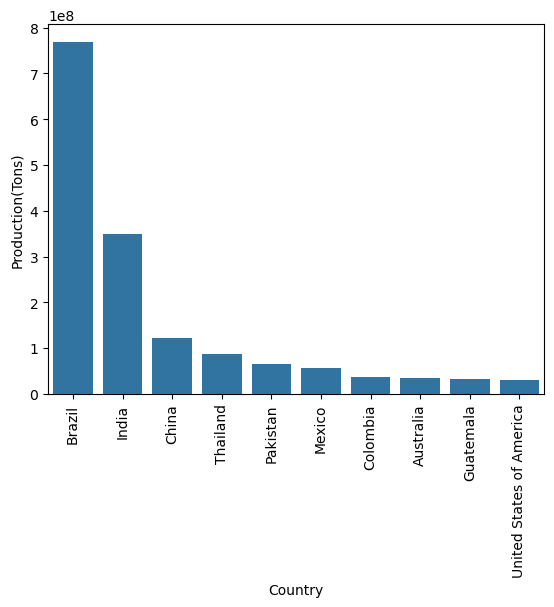

In [55]:
ax = sns.barplot(data = df.head(10), x = 'Country', y = 'Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

### Which Country has the highest land for sugarcane

C:\Users\surab\AppData\Local\Temp\ipykernel_11372\3814879261.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


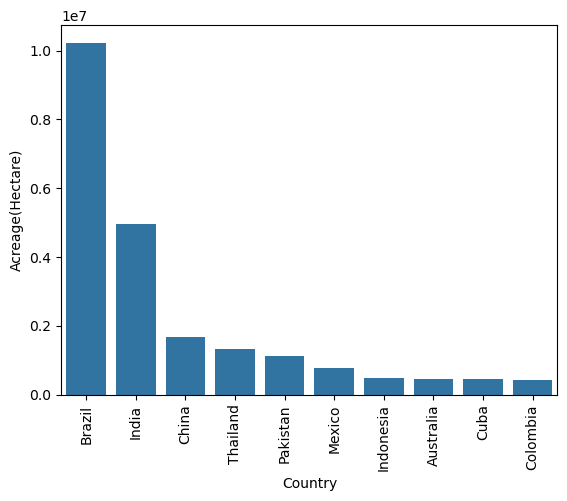

In [60]:
df_acr =df.sort_values('Acreage(Hectare)', ascending =  False)
ax = sns.barplot(data = df_acr.head(10), x = 'Country', y = 'Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

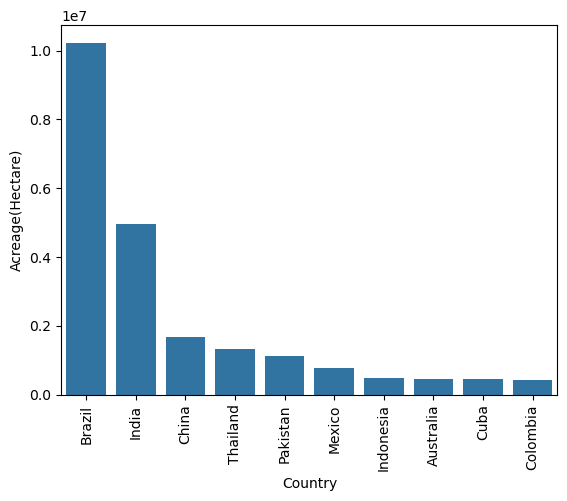

In [63]:
df_acr =df.sort_values('Acreage(Hectare)', ascending =  False)
ax = sns.barplot(data = df_acr.head(10), x = 'Country', y = 'Acreage(Hectare)')
plt.xticks( rotation = 90)
plt.show()

### Which Country has the highest Yeild per Hectare 

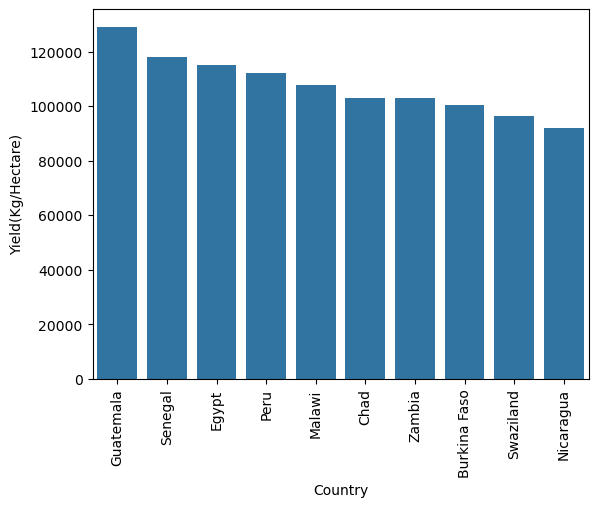

In [64]:
df_Y =df.sort_values('Yield(Kg/Hectare)', ascending =  False)
ax = sns.barplot(data = df_Y.head(10), x = 'Country', y = 'Yield(Kg/Hectare)')
plt.xticks( rotation = 90)
plt.show()

### Which Country has highest production

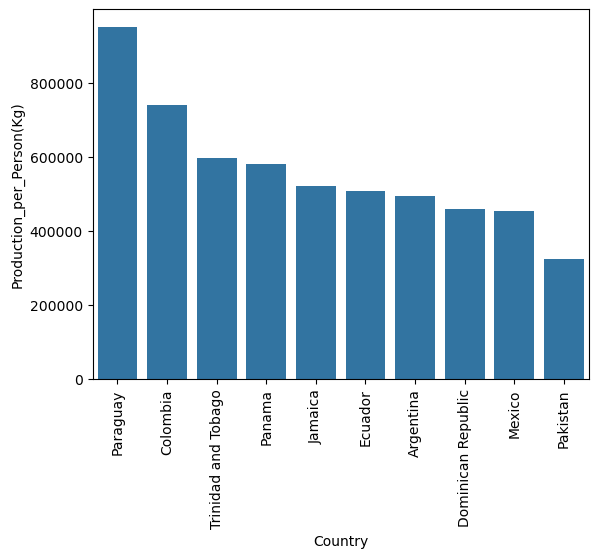

In [65]:
df_P =df.sort_values('Production_per_Person(Kg)', ascending =  False)
ax = sns.barplot(data = df_P.head(10), x = 'Country', y = 'Production_per_Person(Kg)')
plt.xticks( rotation = 90)
plt.show()

### Correlation

In [67]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [68]:
df[['Production(Tons)','Production_per_Person(Kg)','Acreage(Hectare)','Yield(Kg/Hectare)']].corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.016341,0.997550,0.132812
Production_per_Person(Kg),0.016341,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


only the Acreage(Hectare) is correalted with Production(Tons)

<Axes: >

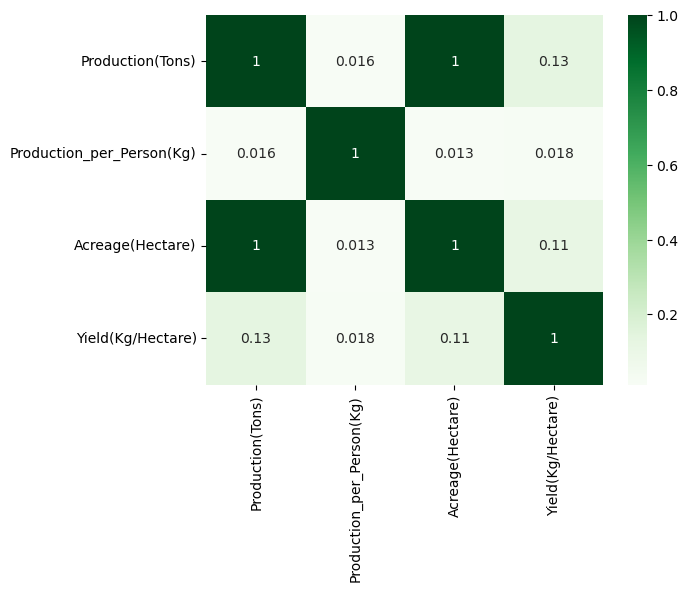

In [74]:
# other way to find visually
sns.heatmap(df.select_dtypes(include = 'number').corr(), annot = True, cmap = 'Greens')

### Do countries with more land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

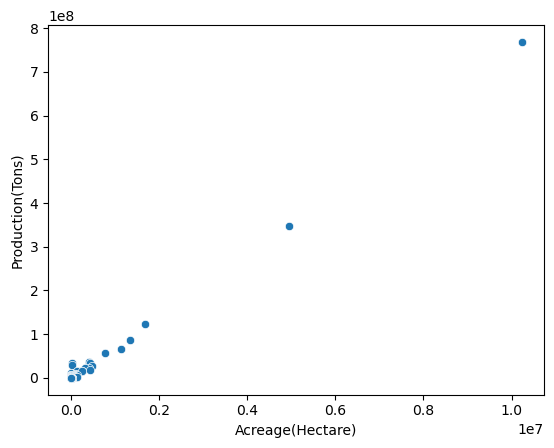

In [75]:
sns.scatterplot(data = df, x = 'Acreage(Hectare)', y = 'Production(Tons)')

Yes, most cases countries with more land has been produce more sugarcane

### Do countries which yeild more sugarcane per hectare produces more sugarcane in total ?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

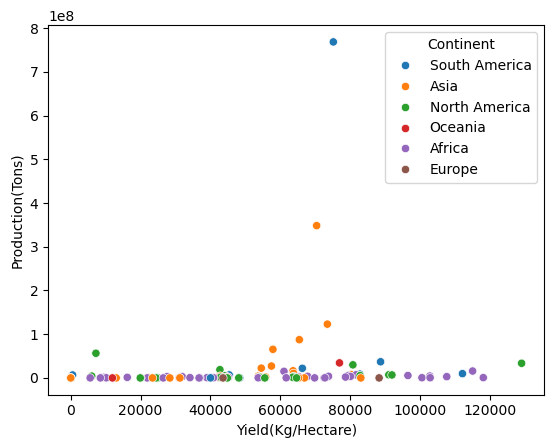

In [98]:
sns.scatterplot(data = df, x = 'Yield(Kg/Hectare)', y = 'Production(Tons)', hue = 'Continent')

### Analysis for continent

In [78]:
df_con = df.groupby("Continent").sum()

In [79]:
df_con

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


### Which Continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

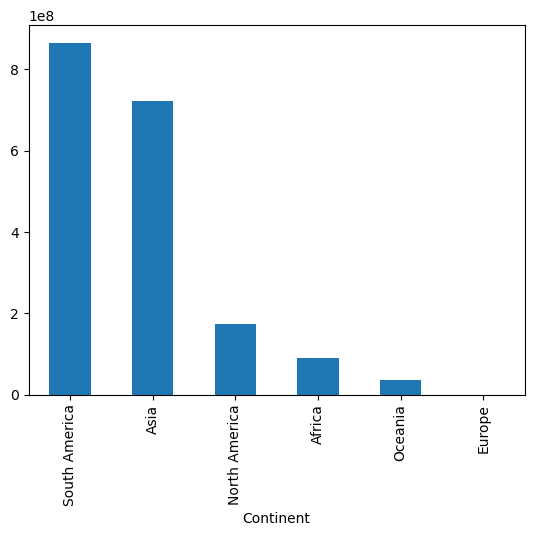

In [83]:
# if things to be sorted 
df_con['Production(Tons)'].sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='Continent'>

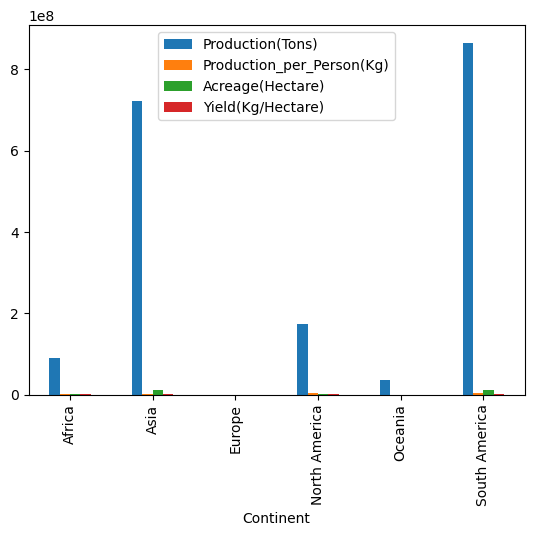

In [82]:
# alt
df_con.plot(kind = 'bar')

### Do no of Countries is continent has any connection with production

In [84]:
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

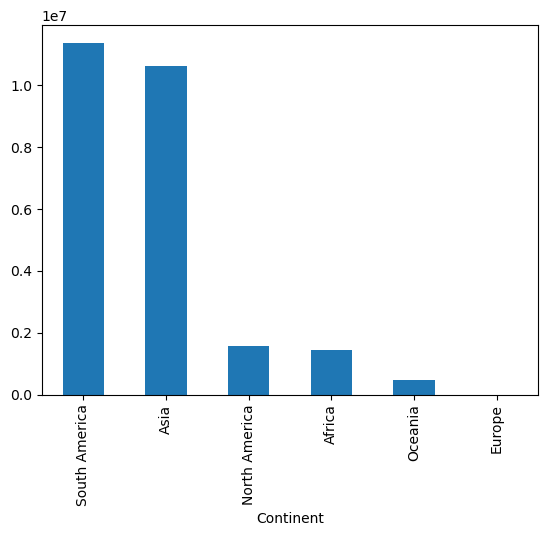

In [85]:
df_con['Acreage(Hectare)'].sort_values(ascending = False).plot(kind = 'bar')

No, Africa has more countries but fewer in prodcution 

### Do no of counties effects production ,whats the relation b/w them ?

In [87]:
df_con['No_of_countires'] = df.groupby('Continent').count()['Country']

In [88]:
df_con

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),No_of_countires
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5,39
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


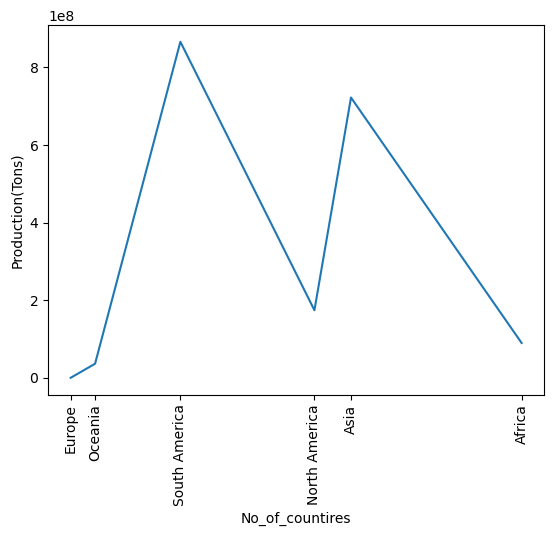

In [91]:
con_names = df_con.index.tolist()
sns.lineplot(data = df_con, x = 'No_of_countires', y = 'Production(Tons)')
plt.xticks(df_con['No_of_countires'], con_names, rotation = 90)
plt.show()

### Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

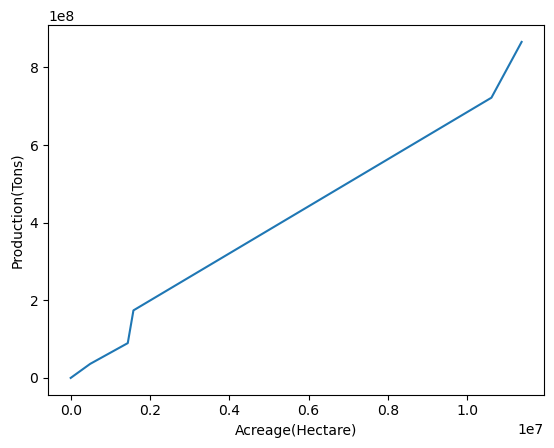

In [100]:
sns.lineplot(data = df_con,x = "Acreage(Hectare)", y= "Production(Tons)" )

### production distribution by continent

<Axes: ylabel='Production(Tons)'>

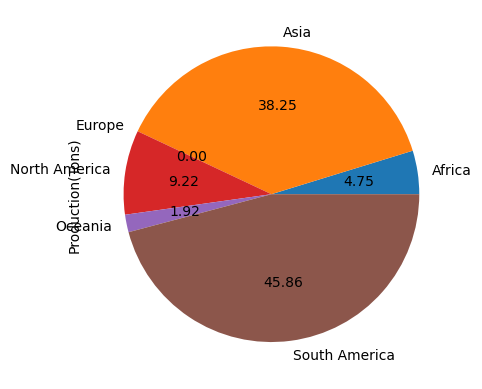

In [96]:
df_con['Production(Tons)'].plot(kind = 'pie',autopct = '%.2f')

### Correlation for continent

In [95]:
df_con.corr(numeric_only = True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),No_of_countires
Production(Tons),1.000000,0.522207,0.994897,0.091201,0.098495
Production_per_Person(Kg),0.522207,1.000000,0.463211,0.542971,0.531984
Acreage(Hectare),0.994897,0.463211,1.000000,0.111166,0.122407
Yield(Kg/Hectare),0.091201,0.542971,0.111166,1.000000,0.991746
No_of_countires,0.098495,0.531984,0.122407,0.991746,1.000000
